<a href="https://colab.research.google.com/github/arminZolfaghari/GAN-for-Cats/blob/main/Cat%20DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.optimizers.legacy import Adam
from IPython import display
from google.colab import drive
import pickle

# Prepare the dataset
### 15747 images (64,64,3)



In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive

 Armin				   geph-android.apk
 Armin_Zolfaghari_Daryani_CV.pdf   geph-windows-setup.exe
 cats				  'How to get started with Drive.pdf'
'Colab Notebooks'		  'nqb-htyd-atp - Nov 27, 2022 (1).gjam'
 dataset.pickle			  'nqb-htyd-atp - Nov 27, 2022.gjam'
 Engineering_Ethics_Summary.gdoc


In [ ]:
cat_images_dir = "/content/gdrive/MyDrive/cats"

dataset = []
for each in os.listdir(cat_images_dir):
  print(each)
  image = cv2.imread(os.path.join(cat_images_dir, each))
  if type(image) != type(None):
      dataset.append(image)

dataset = np.array(dataset)
print(dataset.shape)

In [ ]:
dataset.min(), dataset.max()

(-1.0, 1.0)

In [ ]:
dataset.shape

(15867, 64, 64, 3)

In [ ]:
dataset = (dataset - 127.5)/127.5    # Normalize the images to [-1, 1]
dataset.min(), dataset.max()

### Store the dataset


In [ ]:
base_path = '/content/gdrive/MyDrive/'
file_to_store = open(base_path + "dataset.pickle", "wb")
pickle.dump(dataset, file_to_store)
file_to_store.close()

### Load the dataset

In [ ]:
base_path = '/content/gdrive/MyDrive/'
file_to_read = open(base_path + "dataset.pickle", "rb")
dataset = pickle.load(file_to_read)
file_to_read.close()

In [ ]:
# Batch and shuffle the data
BATCH_SIZE = 64
BUFFER_SIZE = 15867

train_dataset = tf.data.Dataset.from_tensor_slices(dataset).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(train_dataset)

<BatchDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float64, name=None)>


# Create the model


## Generator 


In [ ]:
def generator_model(noise_dim):
    model = tf.keras.Sequential()
    
    model.add(layers.Dense(4*4*1024, input_shape=(noise_dim,)))
    model.add(layers.Reshape((4, 4, 1024)))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(filters=512, kernel_size=(5,5), strides=(2,2), padding='same',
            kernel_initializer=tf.initializers.truncated_normal(stddev=0.02)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(filters=256, kernel_size=(5,5), strides=(2,2), padding='same',
             kernel_initializer=tf.initializers.truncated_normal(stddev=0.02)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same',
             kernel_initializer=tf.initializers.truncated_normal(stddev=0.02)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    

    model.add(layers.Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2,2), padding='same',
             kernel_initializer=tf.initializers.truncated_normal(stddev=0.02)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(filters=3, kernel_size=(5,5), strides=(1,1), padding='same',
             kernel_initializer=tf.initializers.truncated_normal(stddev=0.02),
             activation='tanh'))
    # output (64,64,3)

    return model

tf.Tensor(
[[[[ 6.2981935e-04  1.5120357e-04 -1.4964971e-04]
   [-7.4187243e-05 -2.0854028e-04  2.4058373e-04]
   [ 1.4786233e-04 -2.2296162e-04 -1.8753053e-06]
   ...
   [-2.3190361e-03  1.7008187e-03  4.8302865e-04]
   [-1.2478008e-04 -8.3430088e-04 -5.2601728e-04]
   [-1.9133956e-03 -1.0494604e-04  3.9357235e-04]]

  [[ 3.3203093e-04  8.1681152e-05  1.1936135e-03]
   [-4.8667908e-04 -8.6121977e-04  3.7550856e-04]
   [ 3.2806495e-04  9.4355777e-04  3.7899832e-04]
   ...
   [-1.4771828e-03  2.7611139e-04  4.2425790e-03]
   [ 3.5303537e-04 -9.3307084e-05  7.6198846e-04]
   [ 4.5338529e-05  2.6072218e-04  3.2566288e-03]]

  [[ 2.0166629e-04 -1.2403164e-03  4.8556770e-04]
   [ 7.4690674e-04  2.6831659e-04 -6.4249791e-05]
   [ 6.4882057e-05 -9.3937611e-05  2.6626782e-03]
   ...
   [ 4.2750675e-04  2.2424718e-03 -1.5361434e-03]
   [-1.5990699e-03 -5.4699590e-04  1.6966421e-03]
   [-1.0485256e-03 -9.0016605e-05  3.3501617e-04]]

  ...

  [[-1.2542761e-03  3.8576967e-04 -1.1033562e-03]
   [-

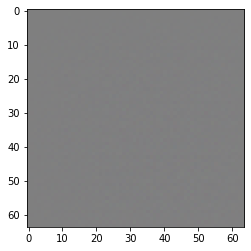

In [ ]:
# Test
noise_dim = 100
generator = generator_model(noise_dim)
noise = tf.random.normal([1, noise_dim])
generated_image = generator(noise, training=False)
print(generated_image)
plt.imshow((generated_image[0, :, :, :] * 0.5) + 0.5)

## Discriminator

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(filters=64, kernel_size=(5,5), strides=(2,2), padding='same', input_shape=(64, 64, 3)))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2D(filters=128, kernel_size=(5,5), strides=(2,2), padding='same'))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2D(filters=256, kernel_size=(5,5), strides=(2,2), padding='same'))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2D(filters=512, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2D(filters=1024, kernel_size=(5,5), strides=(2,2), padding='same'))
    model.add(layers.BatchNormalization(epsilon = 1e-5))
    model.add(layers.LeakyReLU())
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid')) # relu or sigmoid ?!
    
    return model

In [ ]:
# Test

discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.5000171]], shape=(1, 1), dtype=float32)


## Model Loss

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

### Save Checkpoints

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Train the model

In [ ]:
EPOCHS = 150
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

### Generate and save images

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(8, 8))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :] * 0.5 + 0.5)
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        
        print(f"Batch size: {BATCH_SIZE}")
        batch = 0
        for image_batch in dataset:
            batch += 1
            print(f"batch: {batch}")
            train_step(image_batch)
            
        # Produce images for the GIF as you go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                             epoch + 1,
                             seed)
        
        # Save the model every 15 epochs
        if (epoch + 1) % 10 == 0:
          checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
        
    # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
!ls ./training_checkpoints

ls: cannot access './training_checkpoints': No such file or directory


### Save the model

In [ ]:
generator.save_weights('./generator')
discriminator.save_weight('/discriminator')
# load the previously saved wights : generator.load_weights(path)

### Create a GIF

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))